In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [295]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plot
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.regression.quantile_regression as Q_reg
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [296]:
housingData = pd.read_csv("housing_dataset.csv")
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


About Dataset:

**longitude:** describes the location of houses distance from west and East

**latitude:** describes the north and south location distance of houses.

**housingMedianAge:** it shows the Median house age in years

**totalRooms:** gives information about number of rooms in a block

**totalBedrooms:** it shows or gives information about total number of bedrooms in block.

**population:** number of people living in a block 

**households:** gives information about number of families living in a block

**medianIncome:** median income earned by household or families  (measured in tens of thousands of USD)

**medianHouseValue:** gives income about Median house value in a block (measured in US Dollars)

**oceanProximity:** gives information about house location which are near ocean proximity

In [297]:
housingData.shape

(20640, 10)

In [298]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


There are total 20,640 instance in the dataset  

total_bedrooms has 20,433 only, the rest 207 is null values

ocean_proximity is categorical variable

**Missing Values**

In [299]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

**Statistical Information**

In [300]:
housing_data.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


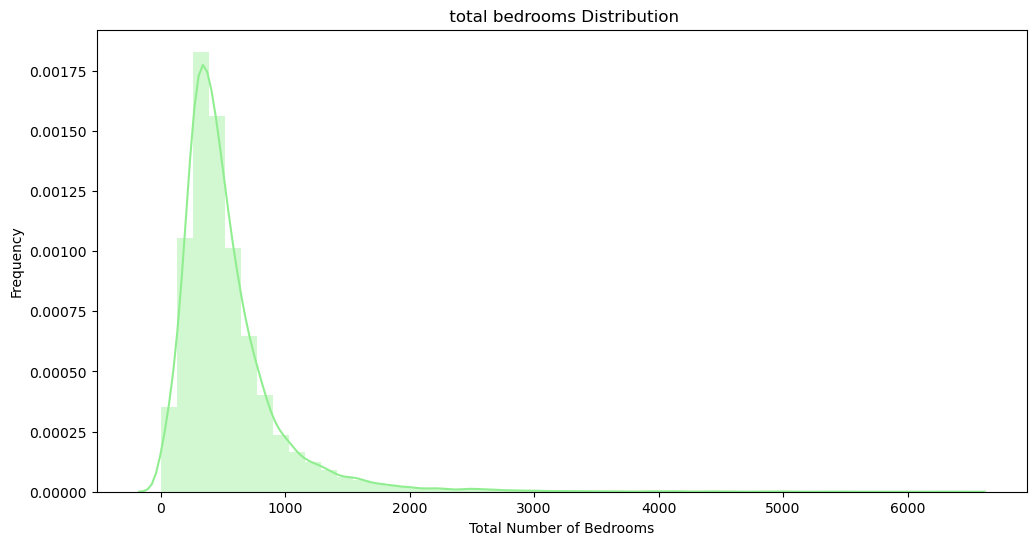

In [301]:
plot.figure(figsize = (12,6))
sb.distplot(x = housingData['total_bedrooms'], color = 'lightgreen')
plot.title(' total bedrooms Distribution')
plot.xlabel('Total Number of Bedrooms')
plot.ylabel('Frequency')
plot.show()

total_bedrooms is positively skewed, thus we will use the median to fill null values because it works best for skewed distributions and the mean is sensitive to data skewness.

In [302]:
housingData['total_bedrooms'].fillna(value = housingData['total_bedrooms'].median(), inplace = True)

In [303]:
housingData.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

No more null values in total_bedrooms.

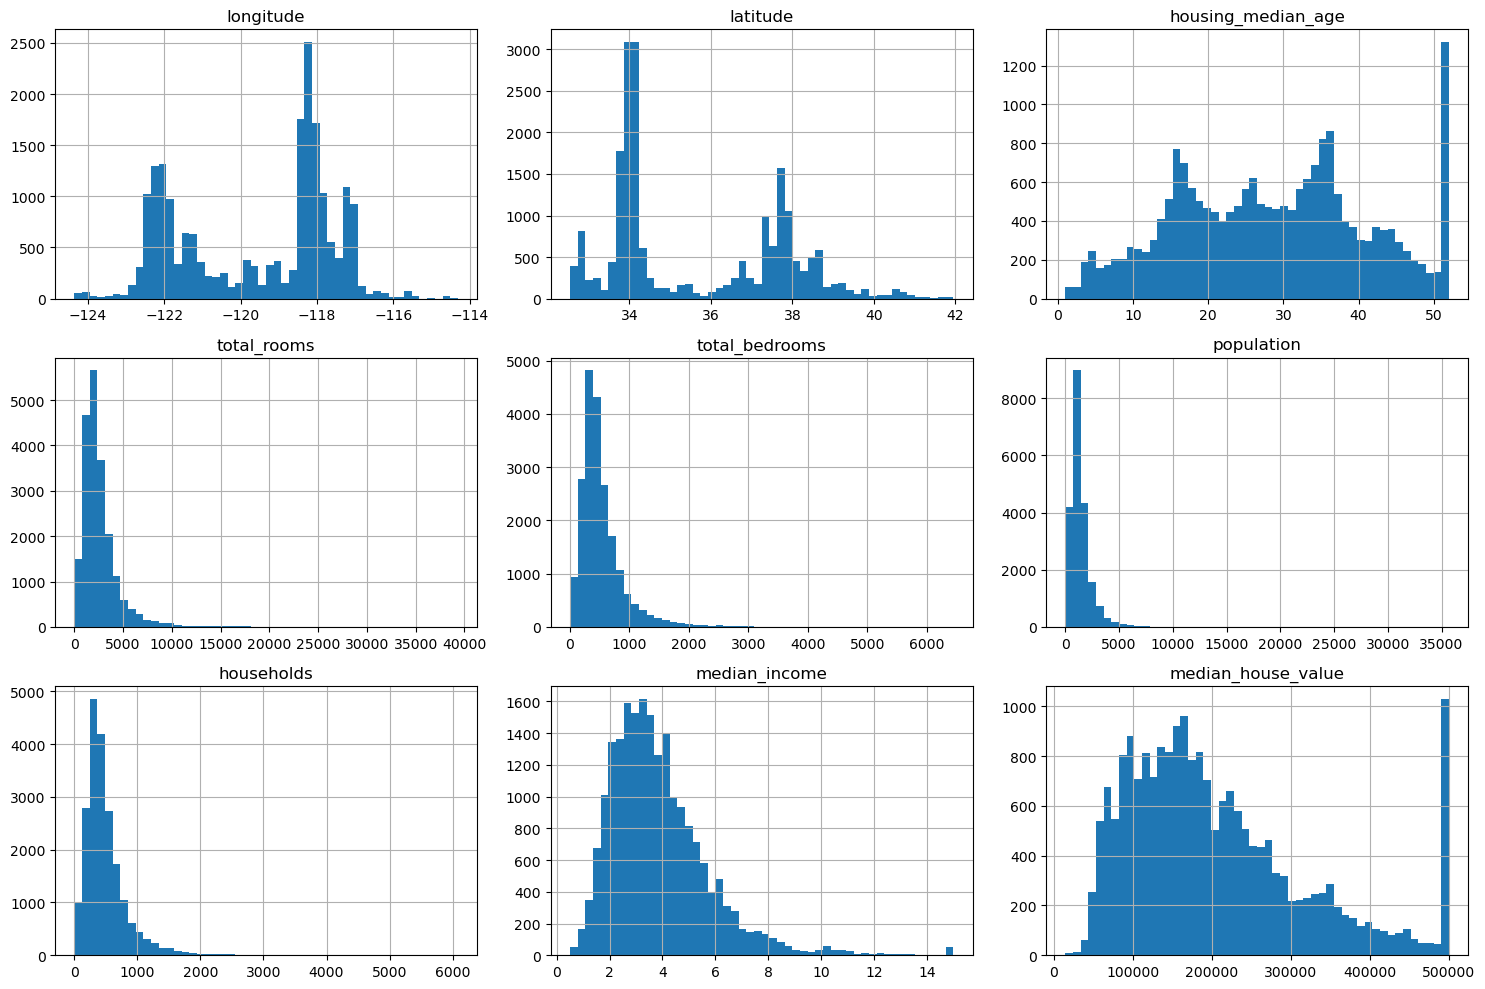

In [304]:
housingData.hist(bins=50, figsize=(15, 10))
plot.tight_layout()
plot.show()

The median age of houses is mostly between 15 to 37 years.

**Distribution of Median Income**

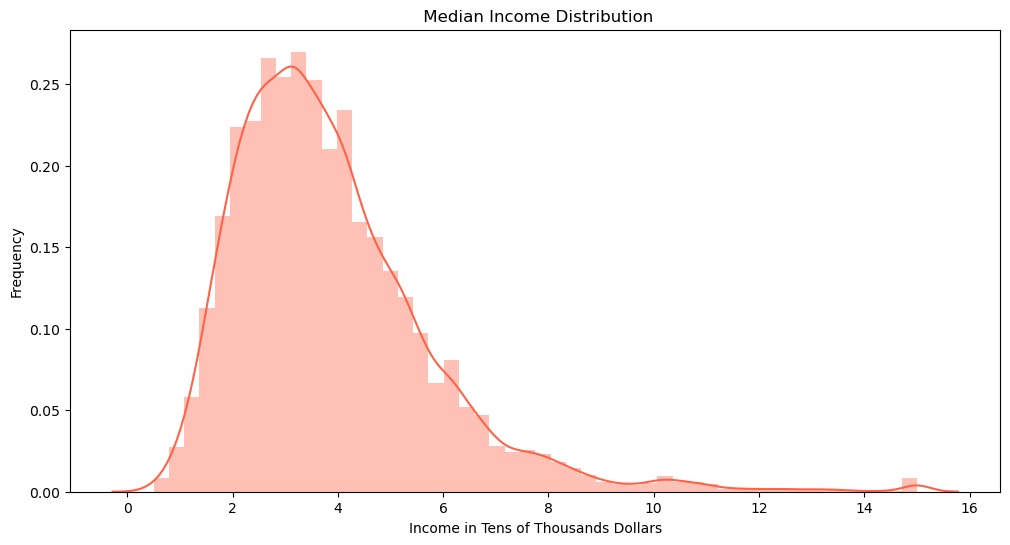

In [305]:
plot.figure(figsize = (12,6))
sb.distplot(x = housingData['median_income'], color = 'tomato')
plot.title(' Median Income Distribution')
plot.xlabel('Income in Tens of Thousands Dollars')
plot.ylabel('Frequency')
plot.show()

It's a positively skewed distribution. The plot demonstrates that the majority of people have income within the same range, with only a few who are on the further side.

**Categorical Variable: Ocean Proximity**

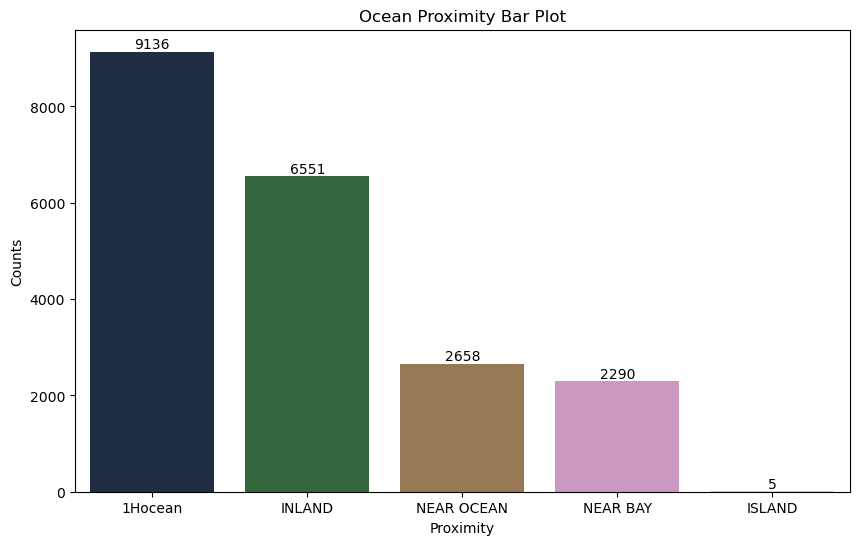

In [306]:
# Change '<1H OCEAN' to '1Hocean' in the 'ocean_proximity' column
# Replace '<1H OCEAN' with '1Hocean'
housingData['ocean_proximity'] = housingData['ocean_proximity'].replace('<1H OCEAN', '1Hocean')

# Verify the change
housingData['ocean_proximity'].unique()

# Get value counts for 'ocean_proximity'
oceanProximityCounts = housingData['ocean_proximity'].value_counts()

# Create the bar plot
plot.figure(figsize=(10, 6))
barplot = sb.barplot(x=oceanProximityCounts.index, y=oceanProximityCounts.values,palette = "cubehelix")

# Add counts on top of the bars
for i, v in enumerate(oceanProximityCounts.values):
    plot.text(i, v, str(v), ha='center', va='bottom')

# Add labels and title
plot.xlabel('Proximity')
plot.ylabel('Counts')
plot.title('Ocean Proximity Bar Plot')

# Show the plot
plot.show()

Five unique values are present in ocean_proximity variable.

**Plotting Median house value vs Median Income**

Text(0.5, 0, 'Median Income')

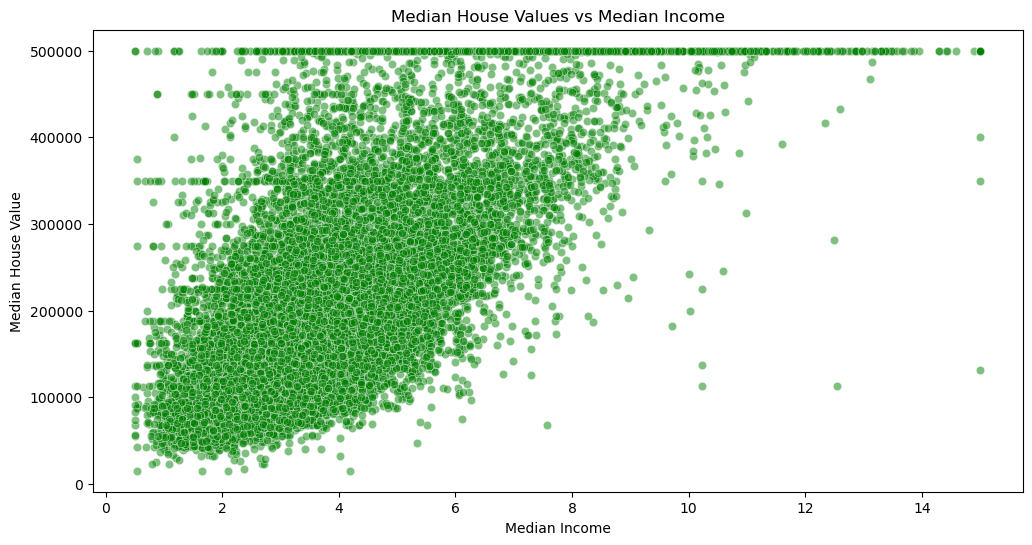

In [307]:
plot.figure(figsize = (12,6))
plot.title("Median House Values vs Median Income")
sb.scatterplot(data = housing_data, y = 'median_house_value', x = 'median_income', alpha = 0.5, color = 'g')
plot.ylabel("Median House Value")
plot.xlabel("Median Income")

We can see that the maximum house value was clearly fixed at $500,000, and any houses more expensive than that received this sum. These records should be removed because they contain an incorrect target value and could affect the algorithm.

There are horizontal lines at specific positions, including 450000, 350000, and 275000. It looks very unnatural, and these values were probably misplaced.

**Removing horizontal lines at specific positions**

**Correlation Matrix and Heatmap**

In [308]:
#housing_data2=housing_data.iloc[:,:-1]
housing_data2 = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=False)


<Axes: >

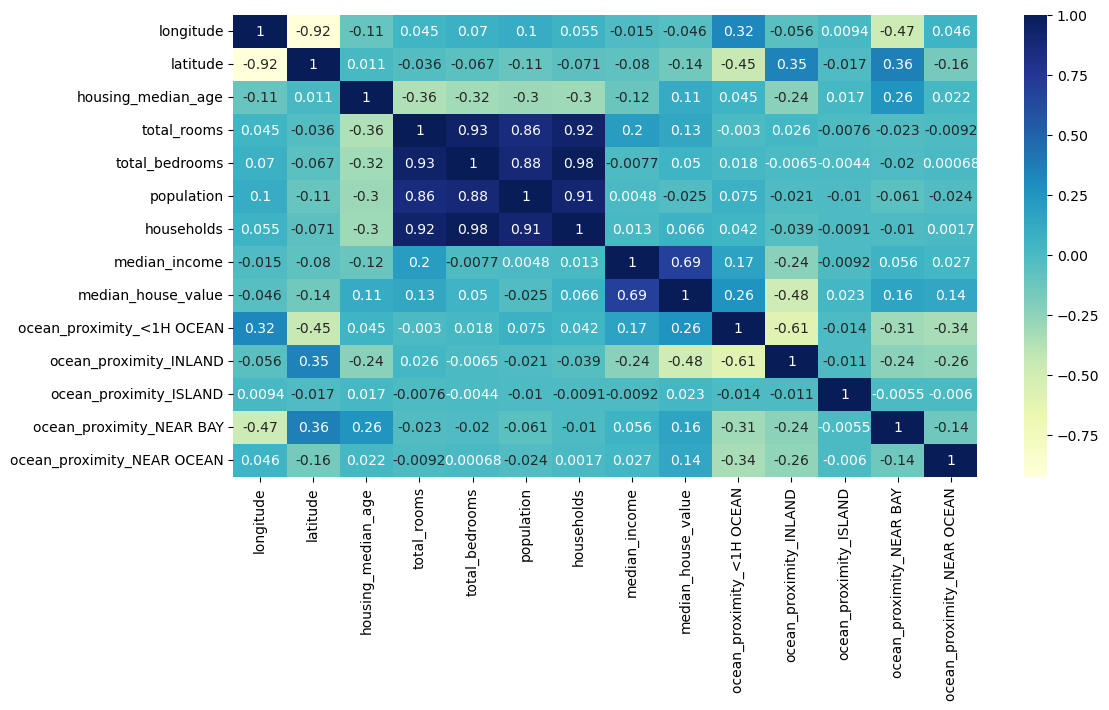

In [309]:
plot.figure(figsize=(12,6))
sb.heatmap(housing_data2.corr(), annot=True, cmap="YlGnBu")

**Ocean Proximity vs Median house value**

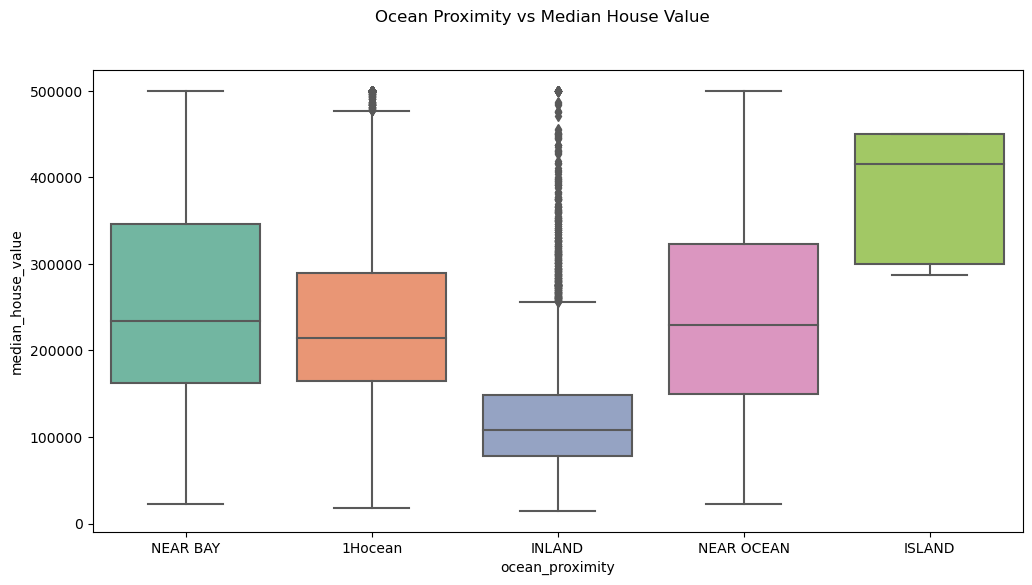

In [310]:

plot.figure(figsize = (12,6))

plot.suptitle('Ocean Proximity vs Median House Value')
sb.boxplot(data=housingData, x="ocean_proximity", y="median_house_value", palette="Set2")

plot.show()

Houses in the "near_bay", "near_ocean", and "<1H ocean" categories are more expensive than those in the inland. Furthermore, these categories have a wider range of prices.

**Extracting useful features from the present variables**

In [311]:
data = housingData
data["rooms/household"] = data["total_rooms"]/data["households"]
data["bedrooms/household"] = data["total_bedrooms"]/data["households"]
data["population/household"] = data["population"]/data["households"]

In [312]:
data[['rooms/household', 'bedrooms/household', 'population/household']].describe()

,rooms/household,bedrooms/household,population/household
count,20640.000000,20640.000000,20640.000000
mean,5.429000,1.100910,3.070655
std,2.474173,0.519159,10.386050
min,0.846154,0.121204,0.692308
25%,4.440716,1.005525,2.429741
50%,5.229129,1.048860,2.818116
75%,6.052381,1.100015,3.282261
max,141.909091,34.066667,1243.333333


In [313]:
data = data.drop(['total_rooms','total_bedrooms','population', 'households'], axis = 1)
data.head()

,longitude,latitude,housing_median_age,median_income,ocean_proximity,median_house_value,rooms/household,bedrooms/household,population/household
0,-122.23,37.88,41,8.3252,NEAR BAY,452600,6.984127,1.023810,2.555556
1,-122.22,37.86,21,8.3014,NEAR BAY,358500,6.238137,0.971880,2.109842
2,-122.24,37.85,52,7.2574,NEAR BAY,352100,8.288136,1.073446,2.802260
3,-122.25,37.85,52,5.6431,NEAR BAY,341300,5.817352,1.073059,2.547945
4,-122.25,37.85,52,3.8462,NEAR BAY,342200,6.281853,1.081081,2.181467


As the 'ISLAND' in ocean proximity has little instances, we are dropping it from dataset.

In [315]:
data = data.loc[data['ocean_proximity'] != 'ISLAND'].reset_index(drop=True)

In [317]:
data['ocean_proximity'].value_counts()

ocean_proximity
1Hocean       9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

**Encoding Categorical Variable - Ocean Proximity**

In [321]:
encoder = OneHotEncoder()

encodedData = encoder.fit_transform(data[['ocean_proximity']]).toarray()
encodedDf = pd.DataFrame(encodedData, columns=encoder.get_feature_names_out(['ocean_proximity']))

#df = data.join(encoded_df)
#df.reset_index(drop=True, inplace=True)
combined_df = data.join(encodedDf)
combined_df.reset_index(drop=True, inplace=True)


In [322]:
#df = df.drop(['ocean_proximity'], axis = 1)
final_df = combined_df.drop(columns=['ocean_proximity'])

In [323]:
final_df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms/household,bedrooms/household,population/household,ocean_proximity_1Hocean,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,8.3252,452600,6.984127,1.023810,2.555556,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,8.3014,358500,6.238137,0.971880,2.109842,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,7.2574,352100,8.288136,1.073446,2.802260,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,5.6431,341300,5.817352,1.073059,2.547945,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,3.8462,342200,6.281853,1.081081,2.181467,0.0,0.0,1.0,0.0


<Axes: >

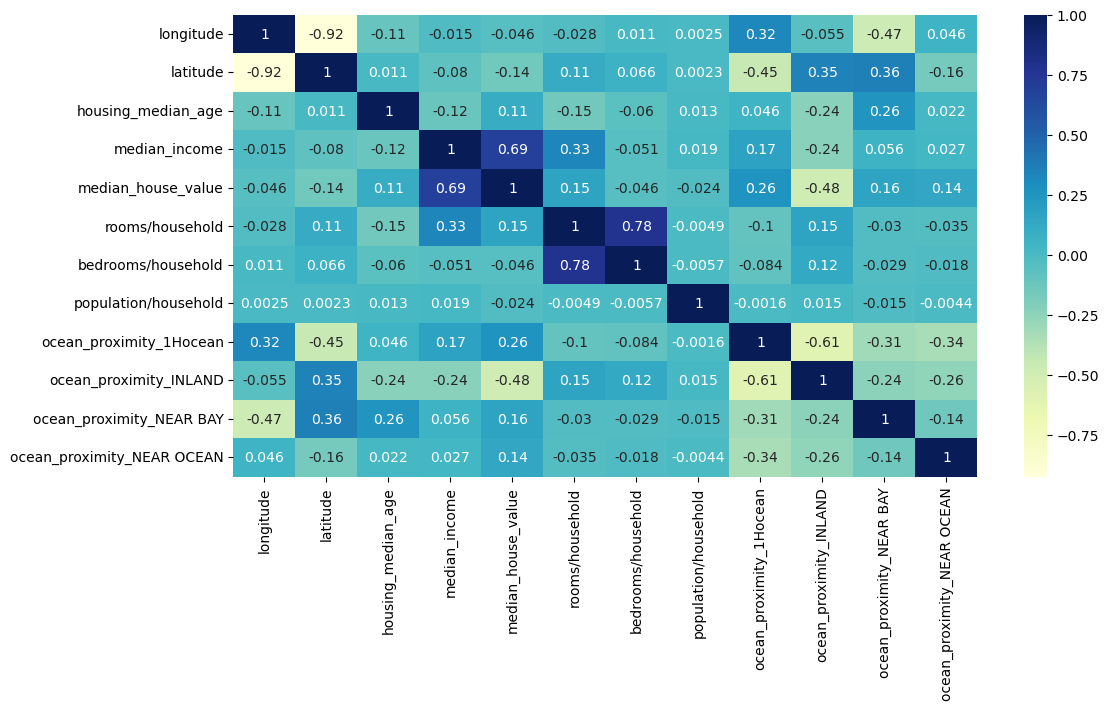

In [324]:
plot.figure(figsize=(12,6))
sb.heatmap(final_df.corr(), annot=True, cmap="YlGnBu")

Data is ready to be split into train and test to train our models.

**Splitting Data**

In [325]:
X = final_df.drop(["median_house_value"], axis=1)
y = final_df["median_house_value"]

In [326]:
X.columns = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in X.columns]

In [327]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state=42)

In [330]:
continuousFeatures = ['longitude', 'latitude', 'housing_median_age', 'median_income', 'rooms/household',	'bedrooms/household',	'population/household']

**Scaling Data**

In [331]:
scaler = StandardScaler()
XTrain[continuousFeatures] = scaler.fit_transform(XTrain[continuousFeatures])
XTest[continuousFeatures] = scaler.transform(XTest[continuousFeatures])

In [332]:
print("X_train shape is ",XTrain.shape)
print("X_test shape is ",XTest.shape)
print("y_train shape is ",yTrain.shape)
print("y_test shape is ",yTest.shape)

X_train shape is  (15476, 11)
X_test shape is  (5159, 11)
y_train shape is  (15476,)
y_test shape is  (5159,)


**1. Quantile Regression**

In [333]:
quantiles = [0.01, 0.1, 0.5, 0.95, 0.99]

In [334]:
def Qreg(q, XTrain, yTrain, XTest):
    qrmodel = sm.QuantReg(yTrain, XTrain).fit(q=q)

    coefs = pd.DataFrame()
    coefs['param'] = qrmodel.params
    coefs = pd.concat([coefs, qrmodel.conf_int()], axis=1)
    coefs['q'] = q
    coefs.columns = ['beta', 'beta_lower', 'beta_upper', 'quantile']

    pred = pd.Series(qrmodel.predict(XTest).round(2))
    return qrmodel, coefs, pred



---


Quantile Regression Summary of each quantile


---



In [335]:
qr_coefs = pd.DataFrame()
qr_actual_prediction = pd.DataFrame()

for qt in quantiles:
    model, coefs, pred = Qreg(qt, XTrain, yTrain, XTest)
    qr_coefs = pd.concat([qr_coefs, coefs])
    qr_actual_prediction = pd.concat([qr_actual_prediction, pred], axis=1)

    print(f"\nQuantile: {qt}\n")
    print(model.summary())


Quantile: 0.01

                         QuantReg Regression Results                          
Dep. Variable:     median_house_value   Pseudo R-squared:               0.2350
Model:                       QuantReg   Bandwidth:                   1.551e+04
Method:                 Least Squares   Sparsity:                    9.979e+05
Date:                Tue, 27 Aug 2024   No. Observations:                15476
Time:                        20:05:47   Df Residuals:                    15465
                                        Df Model:                           10
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
longitude                  -1.135e+04   4122.507     -2.753      0.006   -1.94e+04   -3269.461
latitude                   -1.307e+04   4446.270     -2.940      0.003   -2.18e+04   -4356.352
housing_median_age           997.2829    988.684  



---


Coefficient Estimates


---



In [150]:
qr_coefs

,beta,beta_lower,beta_upper,quantile
longitude,-11350.058456,-19430.656200,-3269.460711,0.01
latitude,-13071.563510,-21786.774807,-4356.352213,0.01
housing_median_age,997.282884,-940.653006,2935.218775,0.01
median_income,38874.596146,35354.547245,42394.645047,0.01
rooms_per_household,10172.845680,5254.520099,15091.171261,0.01
bedrooms_per_household,-9056.061568,-13047.998997,-5064.124139,0.01
population_per_household,-18761.653141,-19123.346729,-18399.959553,0.01
ocean_proximity_1Hocean,110665.954653,107293.154330,114038.754976,0.01
ocean_proximity_INLAND,75974.840918,70716.885033,81232.796803,0.01
ocean_proximity_NEAR BAY,107175.779302,101116.410608,113235.147996,0.01




---


Quantile Regression Predictions with Intervals


---



In [151]:
qr_actual_prediction.columns = quantiles
qr_actual_prediction['actual'] = yTest
qr_actual_prediction['interval'] = qr_actual_prediction[0.99] - qr_actual_prediction[0.01]
qr_actual_prediction = qr_actual_prediction.sort_values('interval').reset_index(drop=True)
qr_actual_prediction

,0.01,0.1,0.5,0.95,0.99,actual,interval
0,61186.14,50902.47,43464.19,39816.84,59337.01,85900,-1849.13
1,7714.67,-3595.13,5122.28,53179.49,33459.32,56100,25744.65
2,13783.46,5063.32,14725.32,47464.51,50136.84,34600,36353.38
3,5105.01,-4228.31,9617.97,49073.93,42914.81,47500,37809.80
4,21113.47,21112.40,40968.35,79756.97,98121.24,58600,77007.77
...,...,...,...,...,...,...,...
5154,563.77,137661.96,408951.90,859399.01,862627.19,193800,862063.42
5155,-15835.13,16710.91,272027.08,846408.13,995660.42,87500,1011495.55
5156,-53858.48,151881.34,516871.00,1069693.55,1047239.74,125000,1101098.22
5157,-69641.85,186142.22,1056263.60,2555933.65,2515797.63,162500,2585439.48




---


Quantile Regression Model Training

---



In [337]:
quantile = 0.5

def Qreg_single(q, XTrain, yTrain, XTest):
    qrModel = sm.QuantReg(yTrain, XTrain).fit(q=q)
    prediction = pd.Series(qrModel.predict(XTest).round(2))
    return prediction

qr_pred = Qreg_single(quantile, XTrain, yTrain, XTest)

In [338]:
# Compute and display the R² score for Quantile Regression
quantileR2 = metrics.r2_score(yTest, qr_pred)
print(f'\nR² score for QR: {quantileR2}')

# Compute and display the Mean Absolute Error (MAE) for Quantile Regression
quantileMAE = metrics.mean_absolute_error(yTest, qr_pred)
print(f'\nMAE : {round(quantileMAE, 2)}')

# Compute and display the Mean Squared Error (MSE) for Quantile Regression
quantileMSE = metrics.mean_squared_error(yTest, qr_pred)
print(f'\nMSE : {round(quantileMSE, 2)}')

# Compute and display the Root Mean Squared Error (RMSE) for Quantile Regression
quantileRMSE = np.sqrt(quantile_mse)
print(f'\nRMSE: {round(quantileRMSE, 2)}')



R² score for QR: 0.5199390696669207

MAE : 50991.32

MSE : 6391568749.32

RMSE: 79947.29


**2. Linear Regression**



---


Coefficient Estimates

---



In [339]:
X_trainLi = sm.add_constant(XTrain)

In [340]:
modelLi = sm.OLS(yTrain, X_trainLi).fit()



---


Summary


---



In [341]:
print(modelLi.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2284.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:07:34   Log-Likelihood:            -1.9488e+05
No. Observations:               15476   AIC:                         3.898e+05
Df Residuals:                   15464   BIC:                         3.899e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               



---

Extracting Coefficient Estimates

---



In [157]:
coefficientsLi = model_li.params
coefficientsLi

const                         3.055434e+16
longitude                    -5.278597e+04
latitude                     -5.218180e+04
housing_median_age            1.108217e+04
median_income                 7.939198e+04
rooms_per_household          -1.773170e+04
bedrooms_per_household        2.242929e+04
population_per_household     -3.756464e+03
ocean_proximity_1Hocean      -3.055434e+16
ocean_proximity_INLAND       -3.055434e+16
ocean_proximity_NEAR BAY     -3.055434e+16
ocean_proximity_NEAR OCEAN   -3.055434e+16
dtype: float64

**Linear Regression Model Training**

In [342]:
li_model = LinearRegression()

In [343]:
li_model.fit(XTrain, yTrain)

LinearRegression()

In [344]:
liPred = li_model.predict(XTest)

In [345]:
# Calculate and print the R² score
r2 = metrics.r2_score(yTest, liPred)
print(f'\nR-squared for LR: {r2}')

# Calculate and print the Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(yTest, liPred)
print(f'\nMAE for LR: {round(mae, 2)}')

# Calculate and print the Mean Squared Error (MSE)
mse = metrics.mean_squared_error(yTest, liPred)
print(f'\nMSE for LR: {round(mse, 2)}')

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'\nRMSE for LR: {round(rmse, 2)}')



R-squared for LR: 0.5576325693930234

MAE for LR: 52754.12

MSE for LR: 5889714547.74

RMSE for LR: 76744.48


**3. Decision-Tree-Regression**

In [162]:
dtModel = DecisionTreeRegressor()

In [163]:
dtModel.fit(XTrain, yTrain)

DecisionTreeRegressor()

In [164]:
dtPred = dtModel.predict(XTest)

In [165]:
# Calculate Decision Tree Regression metrics
mseDtree = metrics.mean_squared_error(yTest, dtPred)
rmseDtree = np.sqrt(mseDtree)
maeDtree = metrics.mean_absolute_error(yTest, dtPred)
r2Dtree = metrics.r2_score(yTest, dtPred)

# Print the metrics with rounding handled by the format specifier
print(f'\nDecision Tree Regression Metrics:')
print(f'R²: {r2Dtree:.4f}')        # R² with 4 decimal places
print(f'MAE: {maeDtree:.2f}')      # MAE with 2 decimal places
print(f'MSE: {mseDtree:.2f}')      # MSE with 2 decimal places
print(f'RMSE: {rmseDtree:.2f}') 


Decision Tree Regression Metrics:
R²: 0.6451
MAE: 44037.66
MSE: 4724717394.03
RMSE: 68736.58


**4. Random Forest Regression**

In [166]:
rfModel = RandomForestRegressor()

In [167]:
rfModel.fit(XTrain, yTrain)

RandomForestRegressor()

In [168]:
rfPred = rfModel.predict(XTest)

In [169]:
r2Rforest = metrics.r2_score(yTest, rfPred)
maeRforest = metrics.mean_absolute_error(yTest, rfPred)
mseRforest = metrics.mean_squared_error(yTest, rfPred)
rmseRforest = np.sqrt(mseRforest)

# Print the metrics using formatted strings
print(f'\nRandom Forest Regression Metrics:')
print(f'R² Score: {r2Rforest:.4f}')       # R² with 4 decimal places
print(f'MAE: {maeRforest:.2f}')  # MAE with 2 decimal places
print(f'MSE: {mseRforest:.2f}')   # MSE with 2 decimal places
print(f'RMSE: {rmseRforest:.2f}')  # RMSE with 2 decimal places


Random Forest Regression Metrics:
R² Score: 0.8134
MAE: 32132.41
MSE: 2484509640.58
RMSE: 49844.86


**5. XGBoost**

In [170]:
xgbModel = XGBRegressor()

In [171]:
xgbModel.fit(XTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [172]:
xgbPred = xgbModel.predict(XTest)

In [173]:
# Calculate XGBoost Regression metrics
r2Xgb = metrics.r2_score(yTest, xgbPred)
maeXgb = metrics.mean_absolute_error(yTest, xgbPred)
mseXgb = metrics.mean_squared_error(yTest, xgbPred)
rmseXgb = np.sqrt(mseXgb)

# Display the metrics using formatted strings
print(f'\nXGBoost Regression Metrics:')
print(f'R² Score: {r2Xgb:.4f}')        # R² with 4 decimal places
print(f'MAE: {maeXgb:.2f}')   # MAE with 2 decimal places
print(f'MSE: {mseXgb:.2f}')    # MSE with 2 decimal places
print(f'RMSE: {rmseXgb:.2f}')  # RMSE with 2 decimal places



XGBoost Regression Metrics:
R² Score: 0.8383
MAE: 30331.21
MSE: 2152612556.29
RMSE: 46396.26


From the models above, Random Forest and XGBoost are performing well on housing dataset. We will fine tune these two models.

**Fine Tuning Models**



1.   Random Forest





In [174]:
randomForestModel = RandomForestRegressor()

param_random = {
    'n_estimators': [15, 30, 50],
    'max_features': [4, 8, 12, 16]
}

gridSearchRandom = GridSearchCV(estimator = randomForestModel, param_grid = param_random, cv=5, scoring='neg_mean_squared_error')
gridSearchRandom.fit(XTrain, yTrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [4, 8, 12, 16],
                         'n_estimators': [15, 30, 50]},
             scoring='neg_mean_squared_error')

In [175]:
bestRandomModel = gridSearchRandom.best_estimator_
bestRandomModel

RandomForestRegressor(max_features=4, n_estimators=50)

In [176]:
randomForest =  RandomForestRegressor(n_estimators=50, max_features=4)

In [177]:
randomForest.fit(XTrain, yTrain)

RandomForestRegressor(max_features=4, n_estimators=50)

In [178]:
randomForestPred = randomForest.predict(XTest)


In [179]:
# Calculate Random Forest (Tuned) Regression metrics
r2_RForestTuned = metrics.r2_score(yTest, randomForestPred)
mae_RForestTuned = metrics.mean_absolute_error(yTest, randomForestPred)
mse_RForestTuned = metrics.mean_squared_error(yTest, randomForestPred)
rmse_RForestTuned = np.sqrt(mse_RForestTuned)

# Display the metrics with appropriate formatting
print(f'\nRandom Forest (Tuned) Regression Metrics:')
print(f'R² Score: {r2_RForestTuned:.4f}')         # R² with 4 decimal places
print(f'MAE: {mae_RForestTuned:.2f}')  # MAE with 2 decimal places
print(f'MSE: {mse_RForestTuned:.2f}')   # MSE with 2 decimal places
print(f'RMSE: {rmse_RForestTuned:.2f}')  # RMSE with 2 decimal places



Random Forest (Tuned) Regression Metrics:
R² Score: 0.8264
MAE: 31409.02
MSE: 2310957522.03
RMSE: 48072.42




2.   XGBoost



In [180]:
xgboostModel = XGBRegressor()

param_xgboost = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gridSearchXgboost = GridSearchCV(estimator = xgboostModel, param_grid = param_xgboost, cv = 5, scoring = 'neg_mean_squared_error')
gridSearchXgboost.fit(XTrain, yTrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [181]:
bestXgboostModel = gridSearchXgboost.best_estimator_
bestXgboostModel

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [184]:
xgboost = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.2)

In [185]:
xgboost.fit(XTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [186]:
xgboostPred = xgboost.predict(XTest)

In [188]:
# Calculate XGBoost (Tuned) Regression metrics
r2_XgbTuned = metrics.r2_score(yTest, xgboostPred)
mae_XgbTuned = metrics.mean_absolute_error(yTest, xgboostPred)
mse_XgbTuned = metrics.mean_squared_error(yTest, xgboostPred)
rmse_XgbTuned = np.sqrt(mse_XgbTuned)

# Display the metrics with formatted strings
print(f'\nXGBoost (Tuned) Regression Metrics:')
print(f'R² Score: {r2_XgbTuned:.4f}')        # R² with 4 decimal places
print(f'MAE: {mae_XgbTuned:.2f}')   # MAE with 2 decimal places
print(f'MSE: {mse_XgbTuned:.2f}')    # MSE with 2 decimal places
print(f'RMSE: {rmse_XgbTuned:.2f}')  # RMSE with 2 decimal places



XGBoost (Tuned) Regression Metrics:
R² Score: 0.8387
MAE: 30065.87
MSE: 2147724626.17
RMSE: 46343.55


**Evaluation Metrics DataFrame**

In [203]:

# Compute the evaluation metrics
metrics_data = {
    'Model': [
        'Quantile-Regression',
        'Linear-Regression',
        'Decision-Tree Regression',
        'Random-Forest-Regression',
        'Random-Forest-Regression (Tuned)',
        'XGBoost',
        'XGBoost (Tuned)'
    ],
    'Mean Absolute Error': [
        metrics.mean_absolute_error(y_test, qr_pred),
        metrics.mean_absolute_error(y_test, li_pred),
        metrics.mean_absolute_error(y_test, dt_pred),
        metrics.mean_absolute_error(y_test, rfPred),
        metrics.mean_absolute_error(y_test, randomForestPred),
        metrics.mean_absolute_error(y_test, xgbPred),
        metrics.mean_absolute_error(y_test, xgboostPred)
    ],
    'Mean Squared Error': [
        metrics.mean_squared_error(y_test, qr_pred),
        metrics.mean_squared_error(y_test, li_pred),
        metrics.mean_squared_error(y_test, dt_pred),
        metrics.mean_squared_error(y_test, rfPred),
        metrics.mean_squared_error(y_test, randomForestPred),
        metrics.mean_squared_error(y_test, xgbPred),
        metrics.mean_squared_error(y_test, xgboostPred)
    ],
    'Root Mean Squared Error': [
        np.sqrt(metrics.mean_squared_error(y_test, qr_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, li_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, dt_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, rfPred)),
        np.sqrt(metrics.mean_squared_error(y_test, randomForestPred)),
        np.sqrt(metrics.mean_squared_error(y_test, xgbPred)),
        np.sqrt(metrics.mean_squared_error(y_test, xgboostPred))
    ],
    'R2 Score': [
        metrics.r2_score(y_test, qr_pred),
        metrics.r2_score(y_test, li_pred),
        metrics.r2_score(y_test, dt_pred),
        metrics.r2_score(y_test, rfPred),
        metrics.r2_score(y_test, randomForestPred),
        metrics.r2_score(y_test, xgbPred),
        metrics.r2_score(y_test, xgboostPred)
    ]
}

# Convert metrics data to DataFrame with formatted values
Metrics_output = pd.DataFrame(metrics_data)

# Format the DataFrame values
Metrics_output['Mean Absolute Error'] = Metrics_output['Mean Absolute Error'].apply(lambda x: f'{x:.2f}')
Metrics_output['Mean Squared Error'] = Metrics_output['Mean Squared Error'].apply(lambda x: f'{x:.2f}')
Metrics_output['Root Mean Squared Error'] = Metrics_output['Root Mean Squared Error'].apply(lambda x: f'{x:.2f}')
Metrics_output['R2 Score'] = Metrics_output['R2 Score'].apply(lambda x: f'{x:.4f}')




In [204]:
Metrics_output

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,Quantile-Regression,50991.32,6391568749.32,79947.29,0.5199
1,Linear-Regression,52754.12,5889714547.74,76744.48,0.5576
2,Decision-Tree Regression,44136.74,4783031693.12,69159.47,0.6408
3,Random-Forest-Regression,32132.41,2484509640.58,49844.86,0.8134
4,Random-Forest-Regression (Tuned),31409.02,2310957522.03,48072.42,0.8264
5,XGBoost,30331.21,2152612556.29,46396.26,0.8383
6,XGBoost (Tuned),30065.87,2147724626.17,46343.55,0.8387


**Model's R2 score**

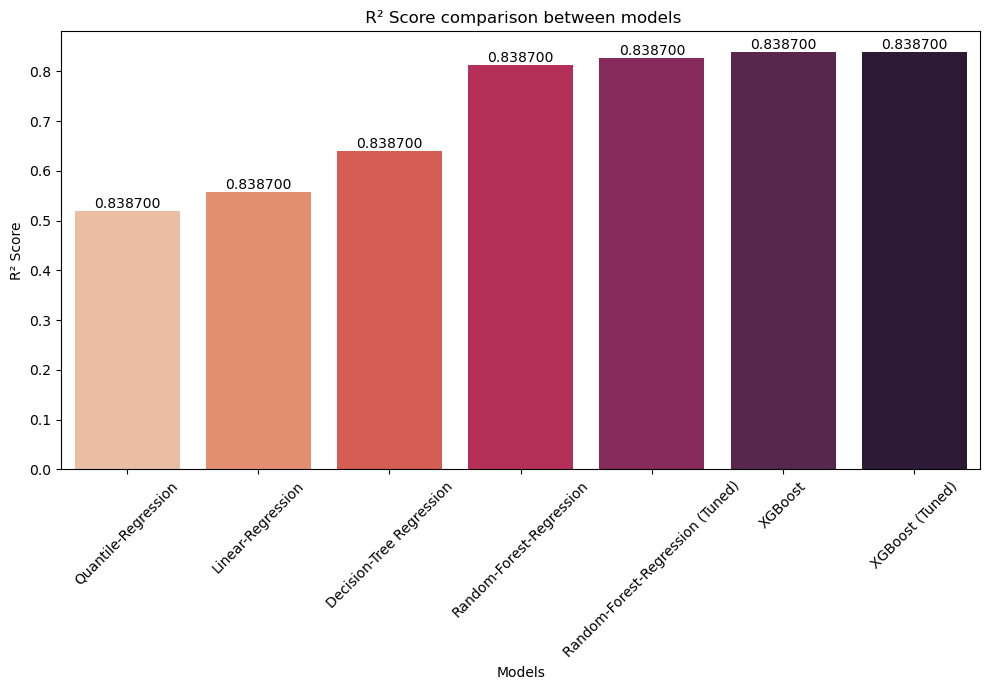

In [205]:
Metrics_output['R2 Score'] = pd.to_numeric(Metrics_output['R2 Score'])

# Plotting
plot.figure(figsize=(10,7))
ax = sb.barplot(x='Model', y='R2 Score', data=Metrics_output, palette='rocket_r')

# Add the R2 Score values on top of the bars
for i, v in enumerate(Metrics_output['R2 Score']):
     ax.text(i, v, f'{value:.6f}', ha='center', va='bottom')

plot.xlabel('Models')
plot.ylabel('R² Score')
plot.title(" R² Score comparison between models")
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

XGBoost (tuned) has the highest R2 score and has the least mean absolute error which shows that model is performing well on the test data.

XGBoost (tuned) has the highest R2 score and has the least mean absolute error which shows that model is performing well on the test data.

**Predicted vs Actual Median House Values using XGBoost (Tuned)**

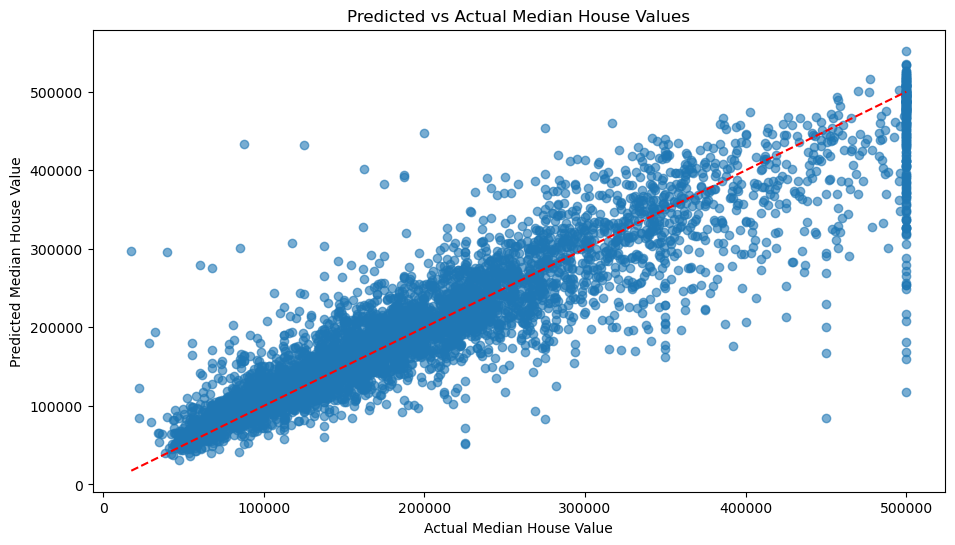

In [206]:
plot.figure(figsize=(11, 6))
plot.scatter(yTest, xgboostPred, alpha=0.6)
plot.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--')
plot.xlabel('Actual Median House Value')
plot.ylabel('Predicted Median House Value')
plot.title('Predicted vs Actual Median House Values')
plot.show()

In [207]:


# Assuming 'data' is your DataFrame containing the dataset
# Log transformation on 'median_income'
data['log_median_income'] = np.log(data['median_income'])

# Update feature list
X = data.drop(["median_house_value"], axis=1)
X['log_median_income'] = np.log(X['median_income'])
X = X.drop('median_income', axis=1)

# Add a constant term
X = sm.add_constant(X)

# Log-transform the target variable
data['logMedianHouseValue'] = np.log(data['median_house_value'])
y = data['logMedianHouseValue']

X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, forcing any problematic data to NaN
X = X.fillna(0)  # filling null values with zero

# Also ensure y is numeric
y = pd.to_numeric(y, errors='coerce')
y = y.fillna(0)  # Handle missing values in the target

# Spliting data into train and test data
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit lR model
linear_model = sm.OLS(yTrain, XTrain).fit()

# Get linear regression coefficients
linear_coefs = linear_model.params
linear_conf_int = linear_model.conf_int()
linear_conf_int.columns = ['beta_lower', 'beta_upper']

# Combine coefficients and confidence intervals
linear_regression_results = pd.concat([linear_coefs, linear_conf_int], axis=1).reset_index()
linear_regression_results.columns = ['feature', 'beta_linear', 'beta_lower_linear', 'beta_upper_linear']

def run_quantile_regression(X, y, quantile):
    qr_model = sm.QuantReg(y, X).fit(q=quantile)
    coefs = pd.DataFrame({
        'feature': X.columns,
        'beta_quantile': qr_model.params,
        'beta_lower_quantile': qr_model.conf_int()[0],
        'beta_upper_quantile': qr_model.conf_int()[1],
    })
    return coefs

# Running quantile regression for 0.5 quantile (median)
quantile_regression_results = run_quantile_regression(X, y, 0.5)

# Intersection of Linear and Quantile Regression Coefficients
intersection = pd.merge(linear_regression_results, quantile_regression_results, on='feature', suffixes=('_linear', '_quantile'))

# Display the results
print("\nIntersection of Coefficients:")
print(intersection[['feature', 'beta_linear', 'beta_quantile', 'beta_lower_linear', 'beta_upper_linear', 'beta_lower_quantile', 'beta_upper_quantile']])



Intersection of Coefficients:
                    feature   beta_linear  beta_quantile  beta_lower_linear  \
0                     const -1.216000e+01  -1.308682e+01      -1.286988e+01   
1                 longitude -2.750240e-01  -2.870864e-01      -2.831406e-01   
2                  latitude -2.745654e-01  -2.874107e-01      -2.822980e-01   
3        housing_median_age  3.087447e-03   3.095415e-03       2.626191e-03   
4           ocean_proximity  2.194568e-12  -6.089940e-11       2.066484e-12   
5       rooms_per_household -3.117821e-02  -3.034542e-02      -3.702385e-02   
6    bedrooms_per_household  2.447275e-01   2.631721e-01       2.153756e-01   
7  population_per_household -1.185378e-03  -5.049229e-02      -1.642046e-03   
8         log_median_income  7.711351e-01   8.086606e-01       7.534824e-01   

   beta_upper_linear  beta_lower_quantile  beta_upper_quantile  
0      -1.145012e+01           -13.740049           -12.433583  
1      -2.669074e-01            -0.294535       